# Efficacité en temps, mémoire et matrices sparse <a class="tocSkip">
      Joseph Salmon : joseph.salmon@umontpellier.fr


## Numba: compilation "Just in Time" (jit) <a class="tocSkip">

Numba convertit les fonctions Python en code machine optimisé au moment de l'exécution à l'aide de la bibliothèque de compilateur LLVM standard.
Les algorithmes numériques compilés par Numba en Python peuvent alors approcher les vitesses de C ou de FORTRAN, la où les boucles classiques, comme en R et matlab, peuvent être un peu lente.

https://numba.pydata.org/

In [1]:
import time
import numpy as np

# Temps et calcul: utilisation de `%timeit`
Remarque pour d'autres commandes *magiques* comme %timeit, %matplotlib, %autoreload: 

In [2]:
n  = 1000
val = 5.4

In [3]:
%timeit a = np.empty(n); a.fill(val)

The slowest run took 61.78 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.63 µs per loop


In [4]:
%timeit a=np.empty(n); a[:]=val

The slowest run took 8.10 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.02 µs per loop


In [5]:
%timeit a = np.full((n,), val)

The slowest run took 24.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.86 µs per loop


In [6]:
%timeit a=np.ones(n)*val

The slowest run took 7.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.35 µs per loop


In [7]:
%timeit a=np.repeat(val,n)

100000 loops, best of 3: 7.81 µs per loop


# Debogage : package `pdb`
https://davidhamann.de/2017/04/22/debugging-jupyter-notebooks/
utiliser  `import pdb; pdb.set_trace()` pour rentrer dans un code et requêter les informations des valeurs. Enfin pour continuer le code entre `c` et la touche `enter`.

On peut consulter aussi:
https://www.codementor.io/stevek/advanced-python-debugging-with-pdb-g56gvmpfa.

Une première manière de procéder est d'utiliser `pdb` et la commade `pdb.set_trace()` de ce package. Une invite de commande se lance alors quand on a un soucis, et on peut alors reprendre la main voir ce qu'il se passe.

In [8]:
def illustrate_pdb(x):
    answer = 42
    import pdb; pdb.set_trace()
    answer += x
    
    return answer

illustrate_pdb(12)

> <ipython-input-8-50ae44a3fcda>(4)illustrate_pdb()
-> answer += x
(Pdb) c


54

Une autre manière de procéder est d'allumer le debogueur `pdb`. Une invite de commande se lance alors quand on a un soucis, et on peut alors reprendre la main voir ce qu'il se passe.

In [9]:
%pdb

Automatic pdb calling has been turned ON


In [10]:
def blobl_func(x):
    answer = 0
    for i in range(x,-1,-1):
        print(i)
        answer += 1 / i
    
    return answer

In [11]:
blobl_func(4)

4
3
2
1
0


ZeroDivisionError: division by zero

> <ipython-input-10-aaadad11a690>(5)blobl_func()
      3     for i in range(x,-1,-1):
      4         print(i)
----> 5         answer += 1 / i
      6 
      7     return answer

ipdb> c


# Notion de tests:
https://semaphoreci.com/community/tutorials/testing-python-applications-with-pytest

# Matrices creuses, graphes et mémoire
http://scipy-lectures.org/advanced/scipy_sparse/introduction.html#why-sparse-matrices

https://rushter.com/blog/scipy-sparse-matrices/

http://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/

Un cadre classique d'application des matrices creuses est le cadre des graphes: bien que le nombre de noeuds puissent être énorme, chaque noeud d'un graphe n'est en général pas relié à tous ces voisins. Si on représente un grapha par ca matrice d'adjacence:

## Définition: *matrice d'adjacence*:
Supposons que $G=(V,E)$ est un graphe, où $\left|V\right|=n$.
Supposons que les sommets de $G$ sont numérotés arbitrairement $v_1,\ldots,v_n$. 
La matrice d'adjacence $A$ de $G$ est la matrice $n \times n$ de terme générale:

$$a_{ij}=\left\{\begin{array}{rl}
	1 & \mbox{si } (v_i,v_j) \in E \\
        0 & \mbox{sinon.}
\end{array}\right.$$


In [12]:
import networkx as nx

In [13]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
G.add_edge('D', 'A', weight=2)

nx.draw(G, with_labels=True)

In [14]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 4 2 3]
 [4 0 2 0]
 [2 2 0 4]
 [3 0 4 0]]


In [15]:
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'D']

## Définition : *matrice d'incidence*
Soit $G = (V,E)$ un graphe (non-orienté) à $n$ sommets, $V = [1,\dots,n] $, et $p$ arrêtes, $E = [1,\dot,p]$.
Le graphe peut être représenté par sa matrice d'incidence arrête-sommet $D^\top = \in \mathbb{R}^{p \times n}$ défini par
\begin{equation}
  (D^\top)_{e,v} =
  \begin{cases}
    + 1, & \text{si } v = \min(i,j) \\
    -1, & \text{si } v = \max(i,j) \\
    0, & \text{sinon}
  \end{cases}\enspace,
\end{equation}
où $e = \{i,j\}$.

## Définition : *matrice d'incidence*

The matrix $L=D D^\top$ is the so-called graph Laplacian of $G$


In [16]:
D = nx.incidence_matrix(G, oriented=True).T
print(D.todense())

[[-1.  1.  0.  0.]
 [-1.  0.  0.  1.]
 [-1.  0.  1.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]


## Visualisation interactive de graphe


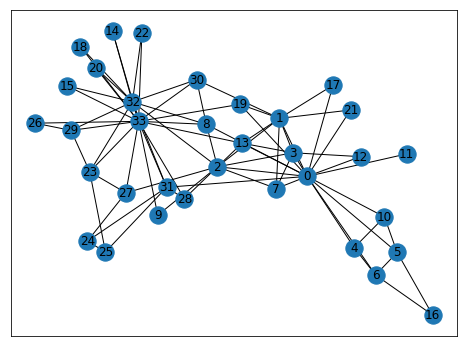

In [17]:
import matplotlib.pylab as plt
g = nx.karate_club_graph()
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

In [18]:
# https://andrewmellor.co.uk/blog/articles/2014/12/14/d3-networks/
# https://github.com/brandomr/ner2sna

from networkx.readwrite import json_graph
data = json_graph.node_link_data(g)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

In [19]:
%%HTML
<iframe height=400px width=100% src='force.html'></iframe>

# Graphe et cartes planaires:
Open Street Map interfacé avec Networkx, le package `osmnx`

In [20]:
import osmnx as ox
ox.utils.config(use_cache=True) # caching lage download 

In [21]:
G = ox.graph_from_place('Montpellier, France', network_type='bike')

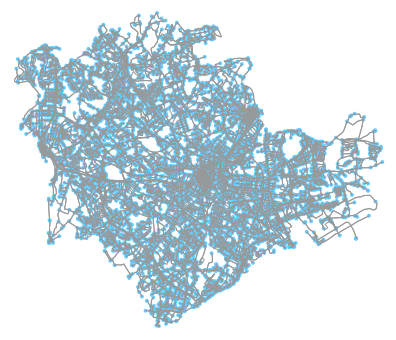

(<Figure size 699.698x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f701141f1d0>)

In [22]:
ox.plot_graph(G)

In [23]:
print(G.number_of_edges())
print(G.number_of_nodes())

32129
14402


# Visualisation d'un chemin le plus court entre deux points.

In [24]:
# https://blog.ouseful.info/2018/06/29/working-with-openstreetmap-roads-data-using-osmnx/
origin = ox.utils.geocode('Place Eugène Bataillon, Montpellier, France')
destination = ox.utils.geocode('Maison du Lez, Montpellier, France')

origin_node =ox.get_nearest_node(G,origin)
destination_node =ox.get_nearest_node(G,destination)

print(origin)
print(destination)
route = nx.shortest_path(G,origin_node,destination_node)

(43.6309201, 3.86110525500256)
(43.61032245, 3.8966295)


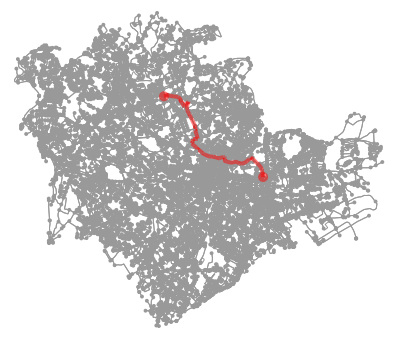

(<Figure size 699.698x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f70117ca630>)

In [25]:
ox.plot_graph_route(G, route)

In [26]:
ox.plot_route_folium(G, route, route_width=2, route_color='#AA1111')  # adapté de : https://blog.ouseful.info/2018/06/29/working-with-openstreetmap-roads-data-using-osmnx/

In [27]:
G.is_multigraph()

True

In [28]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
nodes = ox.graph_to_gdfs(G, nodes=True, edges=False)
# Check columns
print(edges.columns)
print(nodes.columns)

Index(['access', 'bridge', 'geometry', 'highway', 'junction', 'key', 'lanes',
       'length', 'maxspeed', 'name', 'oneway', 'osmid', 'ref', 'service',
       'tunnel', 'u', 'v', 'width'],
      dtype='object')
Index(['highway', 'osmid', 'ref', 'x', 'y', 'geometry'], dtype='object')


In [29]:
D = nx.incidence_matrix(G, oriented=True).T

In [30]:
print('Size of full matrix with zeros: {0:3.2f}  MB'.format(D.data.nbytes/(1024**2)))

Size of full matrix with zeros: 0.49  MB


In [31]:
#Creation d'une matrice de meme taille
M = np.random.randn(G.number_of_nodes(), G.number_of_nodes())

In [32]:
print('Size of full matrix with zeros: {0:3.2f}  MB'.format(M.nbytes/(1024**2)))

Size of full matrix with zeros: 1582.47  MB


## Sparsité du graphe:

In [33]:
print("Il a {0:.2} % d'arrêtes utlile pour représenter le graphe de la ville de Montpellier".format(100 * G.number_of_edges() / G.number_of_nodes() ** 2))

Il a 0.015 % d'arrêtes utlile pour représenter le graphe de la ville de Montpellier


### Remarques : divers type de matrices creuses:

1. bsr_matrix: Block Sparse Row matrix
1. coo_matrix: COOrdinate format matrix
1. csc_matrix: Compressed Sparse Column matrix
1. csr_matrix: Compressed Sparse Row matrix
1. dia_matrix: Sparse matrix with DIAgonal storage
1. dok_matrix: Dictionary Of Keys based sparse matrix.
1. lil_matrix: Row-based linked list sparse matrix


Selon la nature et la structure des données, `csc_matrix` est plus efficace pour le `slicing` par colonne, alors que 
csr_matrix est plus efficace pour le cas ligne (en statistiques et en machine learning c'est souvent `css_matrix` qui sont le plus utilisées.

# Pour aller plus loin sur la visualisation de graphes géographiques:

1. https://geoffboeing.com/2016/11/osmnx-python-street-networks/
1. https://automating-gis-processes.github.io/2017/lessons/L7/network-analysis.html
1. https://automating-gis-processes.github.io/2018/